In [22]:
from __future__ import division, print_function

In [23]:
import sapphire

In [60]:
from sapphire import quick_download
data = quick_download(1007)

100%|###########################################################|Time:  0:00:01


In [61]:
print(data)

data2.h5 (File) ''
Last modif.: 'Tue Nov 24 14:25:25 2020'
Object Tree: 
/ (RootGroup) ''
/s1007 (Group) ''
/s1007/events (Table(26828,)) ''



In [62]:
event_tabel = data.root.s1007.events
event_tabel


/s1007/events (Table(26828,)) ''
  description := {
  "event_id": UInt32Col(shape=(), dflt=0, pos=0),
  "timestamp": Time32Col(shape=(), dflt=0, pos=1),
  "nanoseconds": UInt32Col(shape=(), dflt=0, pos=2),
  "ext_timestamp": UInt64Col(shape=(), dflt=0, pos=3),
  "pulseheights": Int16Col(shape=(4,), dflt=0, pos=4),
  "integrals": Int32Col(shape=(4,), dflt=0, pos=5),
  "n1": Float32Col(shape=(), dflt=0.0, pos=6),
  "n2": Float32Col(shape=(), dflt=0.0, pos=7),
  "n3": Float32Col(shape=(), dflt=0.0, pos=8),
  "n4": Float32Col(shape=(), dflt=0.0, pos=9),
  "t1": Float32Col(shape=(), dflt=0.0, pos=10),
  "t2": Float32Col(shape=(), dflt=0.0, pos=11),
  "t3": Float32Col(shape=(), dflt=0.0, pos=12),
  "t4": Float32Col(shape=(), dflt=0.0, pos=13),
  "t_trigger": Float32Col(shape=(), dflt=0.0, pos=14)}
  byteorder := 'little'
  chunkshape := (819,)

In [63]:
event_tabel[0]

(0, 1606089600, 283996308, 1606089600283996308, [121, 263,  -1,  -1], [1115, 2545,   -1,   -1], 0.62329, 1.6122, -1., -1., 110., 62.5, -1., -1., 112.5)

In [64]:
event_tabel[1]

(1, 1606089600, 404891588, 1606089600404891588, [218, 262,  -1,  -1], [1651, 2299,   -1,   -1], 0.92292, 1.4564, -1., -1., 65., 105., -1., -1., 107.5)

In [67]:
first_event = event_tabel[0]
first_event['timestamp']

1606089600

In [68]:
event_tabel[0][6]

0.62329

In [69]:
print(first_event['n1'])
print(event_tabel[0][6])

0.62329
0.62329


In [70]:
first_event['pulseheights']

array([121, 263,  -1,  -1], dtype=int16)

In [71]:
print("pulshoogte detector 1: %d ADC" % first_event['pulseheights'][0]) 

pulshoogte detector 1: 121 ADC


In [73]:
n1 = event_tabel.col('n1')
n1[:30]


array([ 0.62329,  0.92292,  0.11516,  1.7659 ,  0.91789,  1.1096 ,
        0.13137,  1.999  ,  0.89553,  0.64901,  0.26106,  1.2376 ,
        1.3081 ,  1.8654 ,  1.1789 ,  1.3657 ,  1.2639 ,  0.50478,
        0.2264 ,  0.97659,  2.6134 ,  5.6762 ,  0.30969,  0.10174,
        2.7179 ,  1.5736 ,  0.4254 , 11.352  ,  2.1706 ,  0.95534],
      dtype=float32)

In [74]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Text(0, 0.5, 'counts')

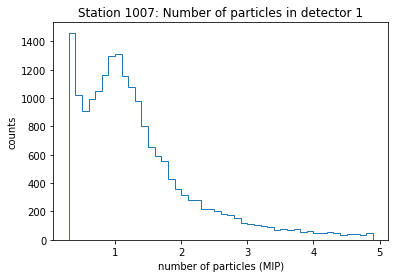

In [76]:
n1 = event_tabel.col('n1')
plt.hist(n1, bins=np.arange(0.3, 5., .1), histtype='step')
plt.title('Station 1007: Number of particles in detector 1')
plt.xlabel('number of particles (MIP)')
plt.ylabel('counts')

In [77]:
events = event_tabel.read()

In [78]:
events['n1']

array([0.62329, 0.92292, 0.11516, ..., 0.84242, 0.23031, 0.36168],
      dtype=float32)

In [80]:
ph = event_tabel.col('pulseheights')
ph1 = ph[:, 0]
ph2 = ph[:, 1]

(10, 10000.0)

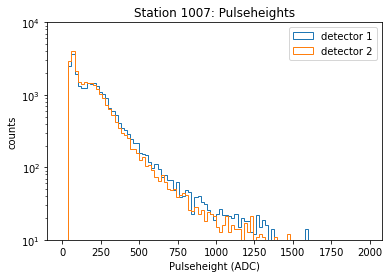

In [81]:
plt.figure()
plt.hist(ph1, bins=np.arange(0, 2000., 20.), histtype='step', log=True)
plt.hist(ph2, bins=np.arange(0, 2000., 20.), histtype='step', log=True)
plt.title('Station 1007: Pulseheights')
plt.xlabel('Pulseheight (ADC)')
plt.ylabel('counts')
plt.legend(['detector 1', 'detector 2' ])
plt.ylim(10, 1e4)

In [58]:
data.close()